## Import Statements

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [118]:
df = pd.read_pickle('Combined_Social_Data_Pickle.pkl')

In [119]:
df.head(5).T

,0,1,2,3,4
Facebook,1,1,1,1,1
Instagram,0,0,0,0,0
Twitter,0,0,0,0,0
Youtube,0,0,0,0,0
age,26,26,26,26,26
artist_name_x,21Savage,21Savage,21Savage,21Savage,21Savage
artist_name_y,21 Savage,21 Savage,21 Savage,21 Savage,21 Savage
count_of_followers,NaN,NaN,NaN,NaN,NaN
created,2015-05-18 15:24:23,2015-05-25 12:00:00,2015-05-25 18:26:12,2015-08-14 12:00:00,2015-09-05 12:00:00
created_12am-6am,0,0,0,0,0


In [120]:
df.shape

(1084355, 42)

## Data Cleaning for Machine Learning

In [121]:
#Only use data from 1/1/16 to 6/1/19
df = df[(df['created']>pd.to_datetime('01-01-2016')) & (df['created']<pd.to_datetime('06-01-2019'))]

In [122]:
print(min(df.created))
print(max(df.created))

2016-01-01 00:00:01
2019-05-31 23:46:40


In [123]:
df.shape

(681571, 42)

In [124]:
#Intentionally leaving out social engagement score, genre for now.
#Omitting within_month and within_week_release since we have num_days_to_track_release
#artist_name_x will need to be removed before GMM
#NLP features should be added once available
features_to_use = ['Facebook','Instagram','Twitter','Youtube','age','artist_name_x','created_12am-6am',
                   'created_12pm-6pm','created_6am-12pm','created_6pm-12am','description_length','hashtag_count',
                   'last_30_days','last_7_days','time_since_last_post','type_link','type_photo','type_text',
                   'type_video','years_active','num_days_to_track_release']

In [125]:
df = df[features_to_use]

In [126]:
df.dropna(inplace=True)

In [127]:
df.shape

(653863, 21)

In [128]:
df['time_since_last_post'] = pd.to_timedelta(df['time_since_last_post'])
df['time_since_last_post'] = [x.total_seconds() for x in df['time_since_last_post']]

In [129]:
df.head().T

,702,703,704,705,706
Facebook,1,1,1,1,1
Instagram,0,0,0,0,0
Twitter,0,0,0,0,0
Youtube,0,0,0,0,0
age,37,37,37,37,37
artist_name_x,AdamLambert,AdamLambert,AdamLambert,AdamLambert,AdamLambert
created_12am-6am,0,0,0,0,0
created_12pm-6pm,1,1,0,1,1
created_6am-12pm,0,0,1,0,0
created_6pm-12am,0,0,0,0,0


In [130]:
df2 = df.drop(columns='artist_name_x')

## Data Standardization / Normalization

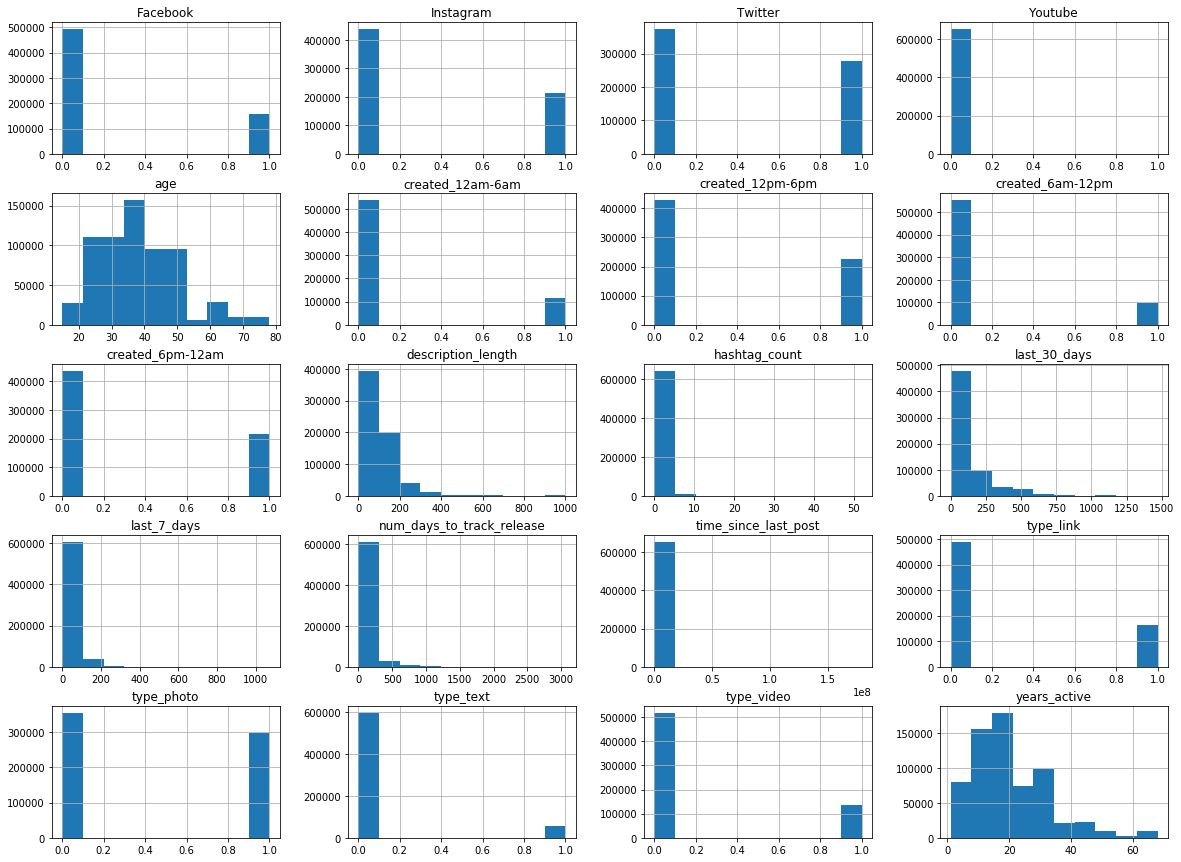

In [131]:
#Check for skew
df2.hist(figsize = (20,15))
plt.show()

In [88]:
df2.describe()

,Facebook,Instagram,Twitter,Youtube,age,created_12am-6am,created_12pm-6pm,created_6am-12pm,created_6pm-12am,description_length,hashtag_count,last_30_days,last_7_days,time_since_last_post,type_link,type_photo,type_text,type_video,years_active,num_days_to_track_release
count,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,6.538630e+05,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000,653863.000000
mean,0.243611,0.327221,0.426987,0.002181,38.065011,0.175346,0.343807,0.150675,0.330172,101.073011,0.748340,132.210328,36.693368,6.780914e+04,0.250692,0.455608,0.087249,0.206452,4.015997,86.258447
std,0.429261,0.469199,0.494641,0.046649,12.031725,0.380263,0.474978,0.357732,0.470275,102.837789,1.472559,163.446778,60.554080,5.271556e+05,0.433412,0.498026,0.282200,0.404759,1.172371,183.857416
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,34.000000,9.000000,2.071000e+03,0.000000,0.000000,0.000000,0.000000,3.175127,7.000000
50%,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,72.000000,19.000000,1.470200e+04,0.000000,0.000000,0.000000,0.000000,4.066395,24.000000
75%,0.000000,1.000000,1.000000,0.000000,45.000000,0.000000,1.000000,0.000000,1.000000,134.000000,1.000000,156.000000,42.000000,6.925000e+04,1.000000,1.000000,0.000000,0.000000,4.954193,82.000000
max,1.000000,1.000000,1.000000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,52.000000,1469.000000,1070.000000,1.788741e+08,1.000000,1.000000,1.000000,1.000000,7.026056,3064.000000


In [92]:
# Most of the continuous features appear skewed right
skews = ['years_active','num_days_to_track_release','time_since_last_post','last_7_days','last_30_days',
        'hashtag_count','description_length','age']

Non-positive values can't be boxcoxed...

num_days_to_track_release

time_since_last_post

last_7_days

last_30_days

hashtag_count

In [66]:
#df2['age'], _ = boxcox(df2['age'])

In [132]:
#Necessary to use this method instead of boxcox since we have 'zero' values in many of the features and
#boxcox is only capable of working with positive values.
pt = PowerTransformer(method='yeo-johnson', standardize=False)
for skew in skews:
    df2[skew] = pt.fit_transform(np.array(df2[skew]).reshape(-1, 1))

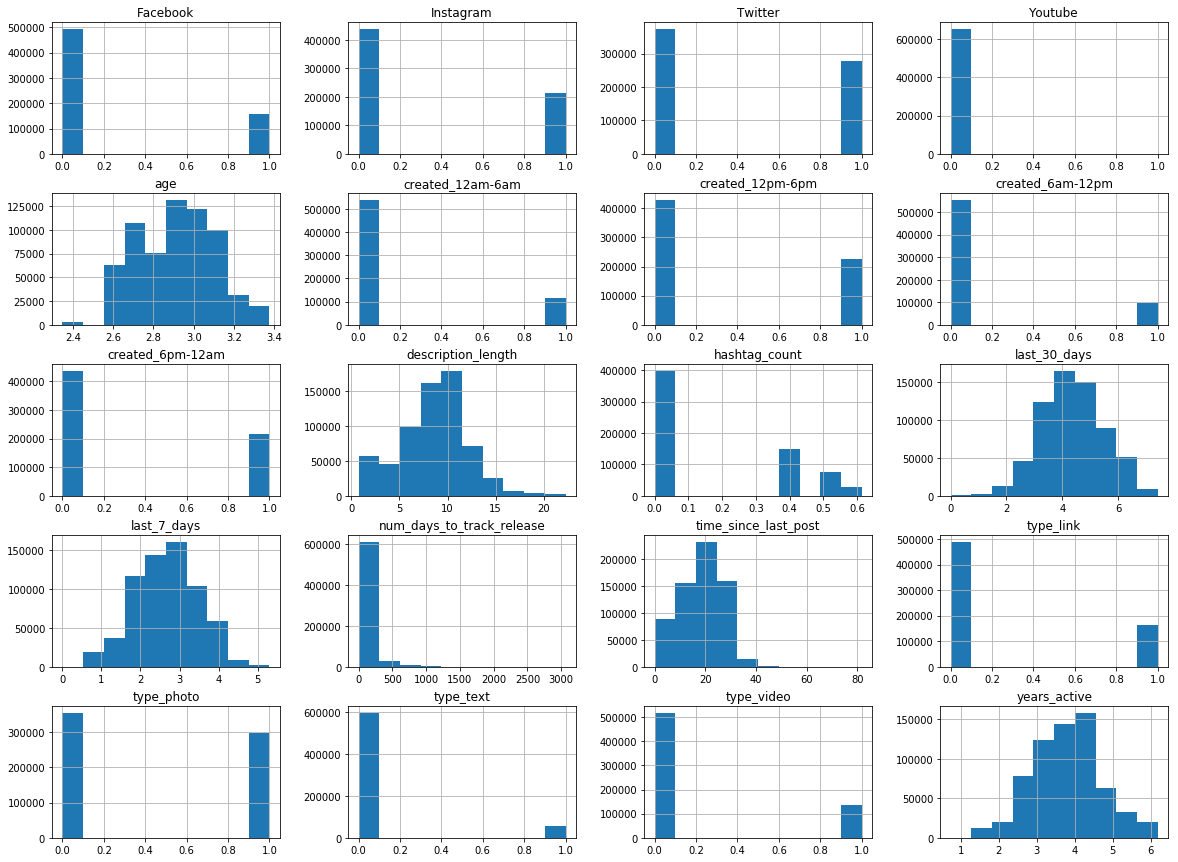

In [133]:
#Check for skew
df2.hist(figsize = (20,15))
plt.show()

In [45]:
scaler = StandardScaler()
df2_norm = scaler.fit_transform(df2)

C:\Users\oldye\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\oldye\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [60]:
df2_norm.shape

(653863, 20)

## GMM Modeling